## Question :
## working on classification of the Iris dataset into different categories

## Importing Libraries & getting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## EDA

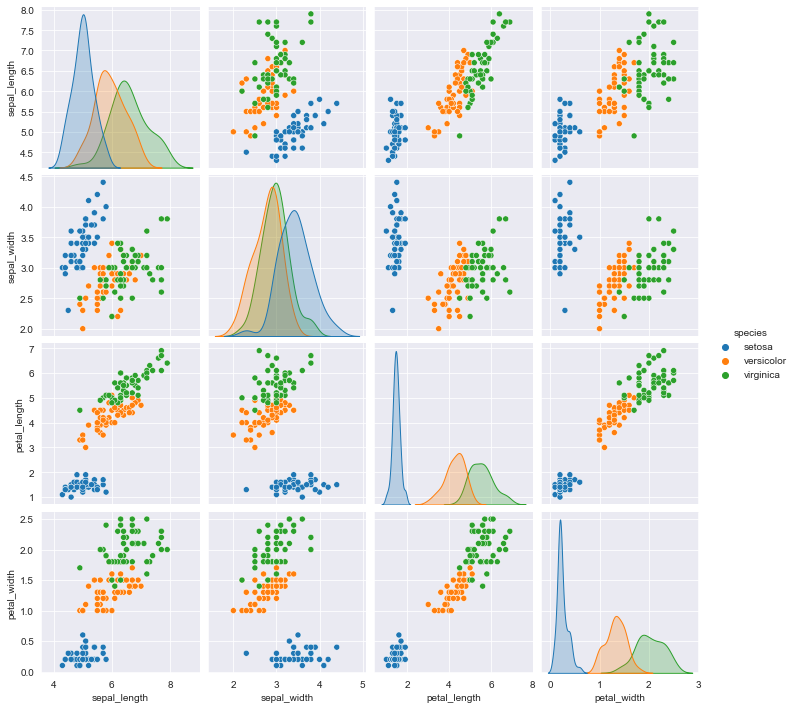

In [5]:
sns.pairplot(data ,hue='species')

In [6]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Selecting Features

In [7]:
X = data.drop('species' ,axis =1)
y = data['species']

X.shape ,y.shape

((150, 4), (150,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

## Model Building

In [9]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train ,y_train)

SVC()

In [10]:
y_pred = model.predict(X_test)

## Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

print('Accuracy of model :' ,accuracy_score(y_test ,y_pred))
print('Classification Report :\n ',classification_report(y_test ,y_pred))

Accuracy of model : 1.0
Classification Report :
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<AxesSubplot:>

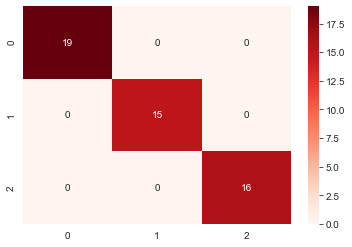

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds')